<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#SPIEGAZIONE DELLA STRATEGIA: SMA
#come prima cosa, anche se è ripetitivo e rallenta il percorso di apprendimento, importiamo nuovamente le librerie che ci servono per operare e preprocessiamo i dati
#per ripartire dall'ambiente creato nella lezione 33
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

In [6]:
df= yf.download ("EURUSD=X")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2025-01-15,1.030684,1.035025,1.027063,1.030684,0
2025-01-16,1.029527,1.031151,1.026378,1.029527,0


In [7]:
df.columns= ["open","high","low","close","volume"]
df

,open,high,low,close,volume
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2025-01-15,1.030684,1.035025,1.027063,1.030684,0
2025-01-16,1.029527,1.031151,1.026378,1.029527,0
2025-01-17,1.030195,1.032972,1.026652,1.030195,0


In [8]:
df["SMA fast"]= df ["close"].rolling(30).mean ()
df["SMA slow"]= df ["close"].rolling(60).mean ()

<Axes: xlabel='Date'>

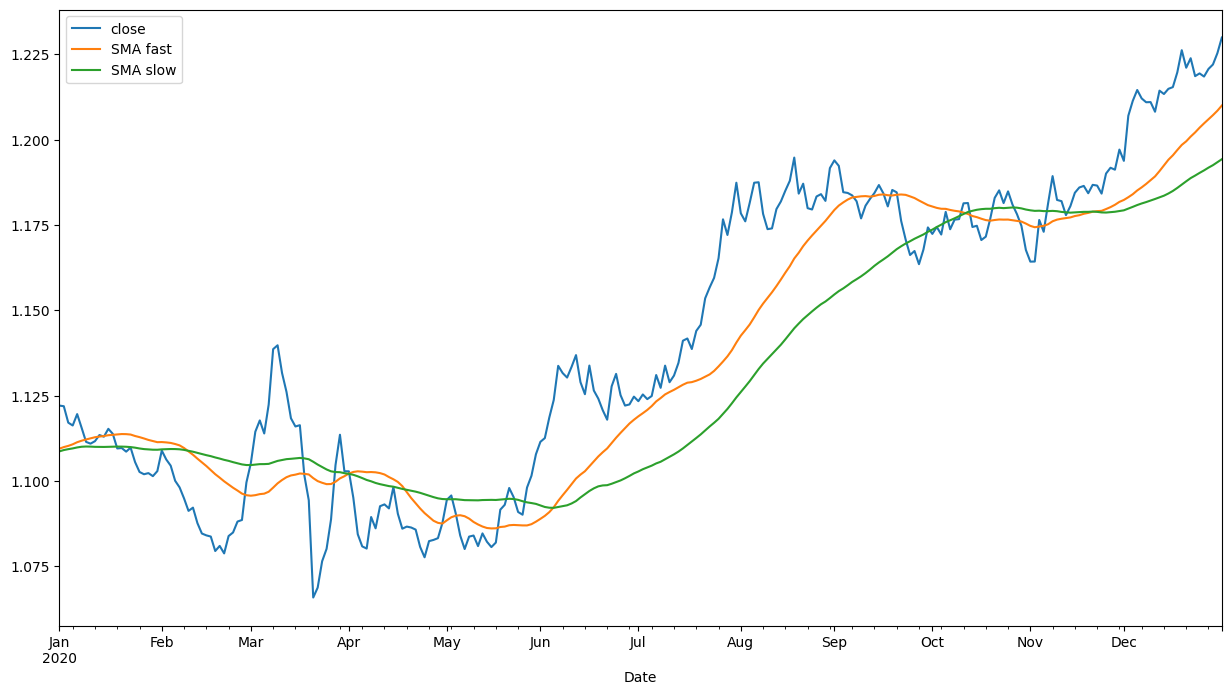

In [9]:
df[["close","SMA fast","SMA slow"]].loc ["2020"].plot (figsize =(15,8))

In [14]:
#STRATEGIA: Explanation
df["position"]= np.nan
#craere la condizione
df.loc [(df["SMA fast"]>df["SMA slow"]), "position"]= 1
df.loc [(df["SMA fast"]<df["SMA slow"]), "position"]= -1
#spiegazione del codice: abbiamo usato l'attributo di pandas LOC per andare aselezionare le colonne che vogliamo utilizzare (in questo caso le colonne e le righe
#prese in considerazione dal calcolo delle due medie mobili) NOTA: L'attributo non richiede una variabile ma si applica "direttamente"
#1 sta per BUY, -1 sta per SELL (da comprendere meglio)
df

,open,high,low,close,volume,SMA fast,SMA slow,position
Date,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-15,1.030684,1.035025,1.027063,1.030684,0,1.041562,1.054485,-1.0
2025-01-16,1.029527,1.031151,1.026378,1.029527,0,1.040844,1.053648,-1.0
2025-01-17,1.030195,1.032972,1.026652,1.030195,0,1.040136,1.052851,-1.0


from matplotlib import pyplot as plt
df['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['low'].plot(kind='hist', bins=20, title='low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='low', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='close', y='SMA fast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['volume']
  ys = series['open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('volume')
_ = plt.ylabel('open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['volume']
  ys = series['high']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('volume')
_ = plt.ylabel('high')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['volume']
  ys = series['low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('volume')
_ = plt.ylabel('low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['volume']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('volume')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
df['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

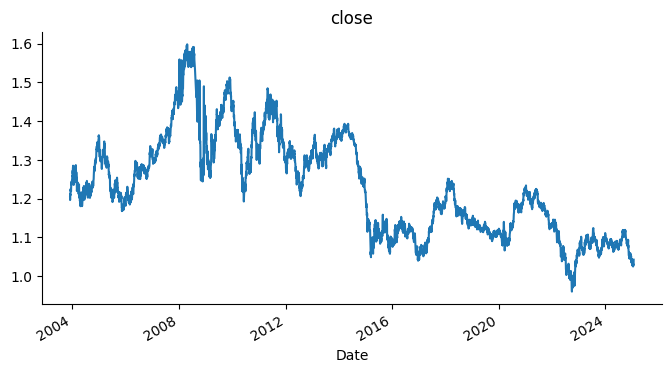

In [18]:
from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

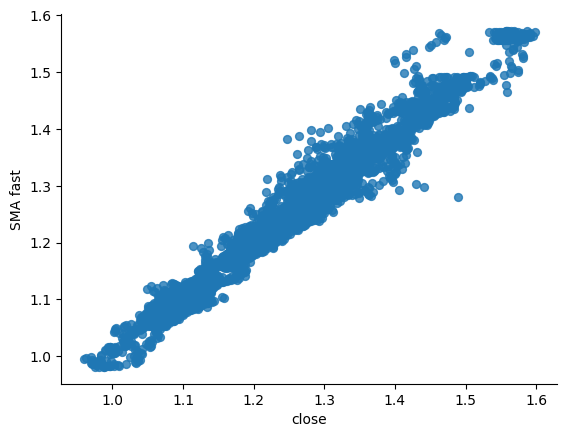

In [17]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='close', y='SMA fast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)